In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

### Variasi 1

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [3]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3425 - loss: 1.8010 - val_accuracy: 0.5365 - val_loss: 1.3120
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5575 - loss: 1.2564 - val_accuracy: 0.5811 - val_loss: 1.1876
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.6108 - loss: 1.1111 - val_accuracy: 0.6226 - val_loss: 1.0966
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6454 - loss: 1.0118 - val_accuracy: 0.6516 - val_loss: 1.0178
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6697 - loss: 0.9412 - val_accuracy: 0.6518 - val_loss: 1.0122
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6911 - loss: 0.8865 - val_accuracy: 0.6618 - val_loss: 0.9979
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7107 - loss: 0.8344 - val_accuracy: 0.6700 - val_loss: 0.9731
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7234 - loss: 0.7936 - 

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 5 x 5 dan aktivasi relu<br/>
- filter 64 dengan ukuran 5 x 5 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_2 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.3250 - loss: 1.8393 - val_accuracy: 0.4929 - val_loss: 1.4107
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5254 - loss: 1.3222 - val_accuracy: 0.5512 - val_loss: 1.2683
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.5891 - loss: 1.1702 - val_accuracy: 0.5905 - val_loss: 1.1526
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6288 - loss: 1.0526 - val_accuracy: 0.6336 - val_loss: 1.0689
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6572 - loss: 0.9761 - val_accuracy: 0.6389 - val_loss: 1.0402
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6863 - loss: 0.8919 - val_accuracy: 0.6569 - val_loss: 0.9890
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7039 - loss: 0.8512 - val_accuracy: 0.6540 - val_loss: 1.0113
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7276 - loss: 0.7809 - val_ac

### Variasi 3

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 7 x 7 dan aktivasi relu<br/>
- filter 64 dengan ukuran 7 x 7 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
model_3 = Sequential([
    Conv2D(32, (7, 7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (7, 7), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3078 - loss: 1.8834 - val_accuracy: 0.4532 - val_loss: 1.4853
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4807 - loss: 1.4351 - val_accuracy: 0.5050 - val_loss: 1.3579
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5405 - loss: 1.2820 - val_accuracy: 0.5636 - val_loss: 1.2200
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5807 - loss: 1.1935 - val_accuracy: 0.5854 - val_loss: 1.1904
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6142 - loss: 1.0965 - val_accuracy: 0.5888 - val_loss: 1.1737
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6318 - loss: 1.0455 - val_accuracy: 0.5991 - val_loss: 1.1496
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6559 - loss: 0.9768 - val_accuracy: 0.6109 - val_loss: 1.1190
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6748 - loss: 0.9310 - val_accu

In [6]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      1000
           1       0.81      0.81      0.81      1000
           2       0.53      0.65      0.58      1000
           3       0.49      0.58      0.53      1000
           4       0.76      0.46      0.57      1000
           5       0.60      0.52      0.56      1000
           6       0.71      0.82      0.76      1000
           7       0.74      0.74      0.74      1000
           8       0.82      0.74      0.78      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

Macro F1-score: 0.6838


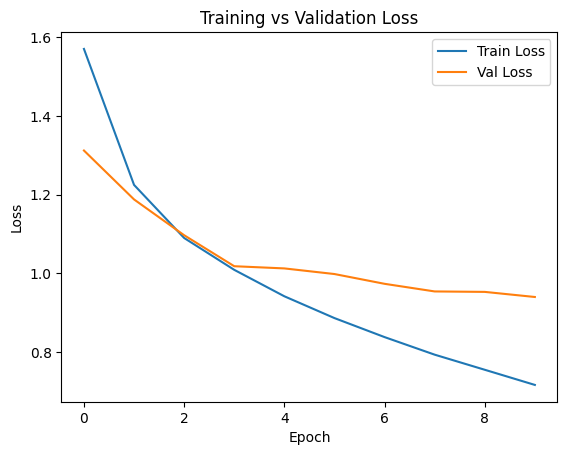

0.6837628940604779

In [7]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.83      0.80      0.82      1000
           2       0.53      0.61      0.57      1000
           3       0.47      0.53      0.50      1000
           4       0.65      0.58      0.61      1000
           5       0.61      0.47      0.53      1000
           6       0.72      0.75      0.73      1000
           7       0.75      0.74      0.74      1000
           8       0.70      0.87      0.77      1000
           9       0.80      0.74      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

Macro F1-score: 0.6765


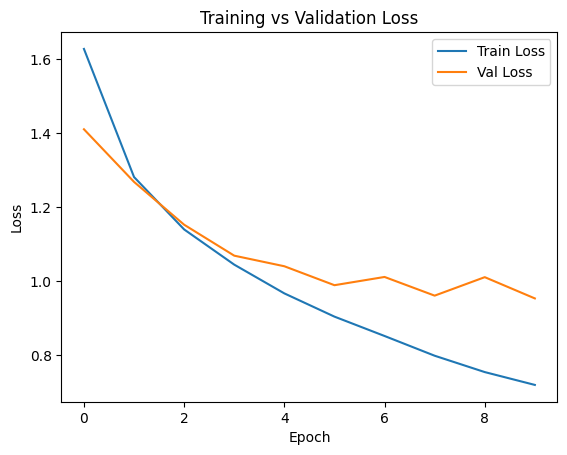

0.676532904404948

In [8]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1000
           1       0.72      0.76      0.74      1000
           2       0.49      0.54      0.51      1000
           3       0.47      0.37      0.41      1000
           4       0.60      0.51      0.55      1000
           5       0.49      0.58      0.53      1000
           6       0.68      0.74      0.71      1000
           7       0.70      0.67      0.68      1000
           8       0.86      0.60      0.70      1000
           9       0.67      0.72      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

Macro F1-score: 0.6207


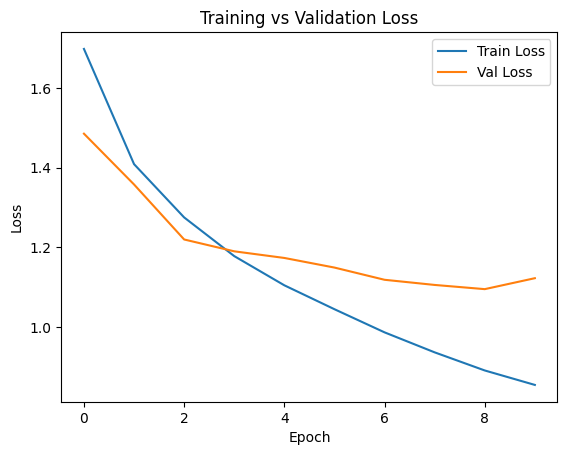

0.6206650646346189

In [9]:
evaluate_model(model_3, x_test, y_test, history_3)